# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 7: Numerical Differentiation & Boundary Value Problems (BVPs) <a class="tocSkip">
    
### Homework Exercises - Solutions <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Taylor-series" data-toc-modified-id="Homework---Taylor-series-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Taylor series</a></span><ul class="toc-item"><li><span><a href="#Solution---Taylor-series" data-toc-modified-id="Solution---Taylor-series-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution - Taylor series</a></span></li></ul></li><li><span><a href="#Homework---Upwind-vs-central-discretrisation" data-toc-modified-id="Homework---Upwind-vs-central-discretrisation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Upwind vs central discretrisation</a></span><ul class="toc-item"><li><span><a href="#Solution---Upwind-vs-central-discretrisation" data-toc-modified-id="Solution---Upwind-vs-central-discretrisation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution - Upwind vs central discretrisation</a></span></li></ul></li><li><span><a href="#Homework---Larger-stencils-/-higher-orders-of-accuracy-[$\star\star$]" data-toc-modified-id="Homework---Larger-stencils-/-higher-orders-of-accuracy-[$\star\star$]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Larger stencils / higher orders of accuracy [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Larger-stencils-/-higher-orders-of-accuracy" data-toc-modified-id="Solution---Larger-stencils-/-higher-orders-of-accuracy-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution - Larger stencils / higher orders of accuracy</a></span></li></ul></li><li><span><a href="#Homework---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---pure-diffusion-case-[$\star$]" data-toc-modified-id="Homework---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---pure-diffusion-case-[$\star$]-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Shooting method to solve BVPs (or IVP solve + root finding) - pure diffusion case [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---pure-diffusion-case" data-toc-modified-id="Solution---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---pure-diffusion-case-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution - Shooting method to solve BVPs (or IVP solve + root finding) - pure diffusion case</a></span></li></ul></li><li><span><a href="#Homework---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---advection-diffusion-case-[$\star$]" data-toc-modified-id="Homework---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---advection-diffusion-case-[$\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Shooting method to solve BVPs (or IVP solve + root finding) - advection-diffusion case [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---advection-diffusion-case" data-toc-modified-id="Solution---Shooting-method-to-solve-BVPs-(or-IVP-solve-+-root-finding)---advection-diffusion-case-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution - Shooting method to solve BVPs (or IVP solve + root finding) - advection-diffusion case</a></span></li></ul></li><li><span><a href="#Homework---Sparse-matrices-&amp;-Iterative-solvers-[$\star\star$]" data-toc-modified-id="Homework---Sparse-matrices-&amp;-Iterative-solvers-[$\star\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Sparse matrices &amp; Iterative solvers [$\star\star$]</a></span><ul class="toc-item"><li><span><a href="#Solutions---Sparse-matrices-&amp;-Iterative-solvers" data-toc-modified-id="Solutions---Sparse-matrices-&amp;-Iterative-solvers-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Solutions - Sparse matrices &amp; Iterative solvers</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import scipy.linalg as sl
# we'll start using sparse matrices here
import scipy.sparse as sp
# and linear algebra functions designed for sparse matrices
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Taylor series

[This is a repeat of a question from ACSE-2, in case you didn't get around to it then].

We saw an [animated gif from Wikipedia](https://en.wikipedia.org/wiki/Taylor_series#/media/File:Exp_series.gif) at the start of the lecture for how the Taylor series approximation to the exponential function, around the point $x=0$, more closely resembles the exponential function over the domain $[-3,3]$ as more terms are included in the expansion.

Write a script which computes and plots this approximation for increasing numbers of terms in the expansion (essentially recreating that animation - but a static image will be fine).

Plot the convergence of the RMS (root mean square) error computed with 1000 points over the interval $[-3,3]$ with number of terms.

Hint: since the derivative of $\exp(x)$ is also $\exp(x)$, you can re-use a single function for all the derivatives you require int he Taylor series expansion.

### Solution - Taylor series

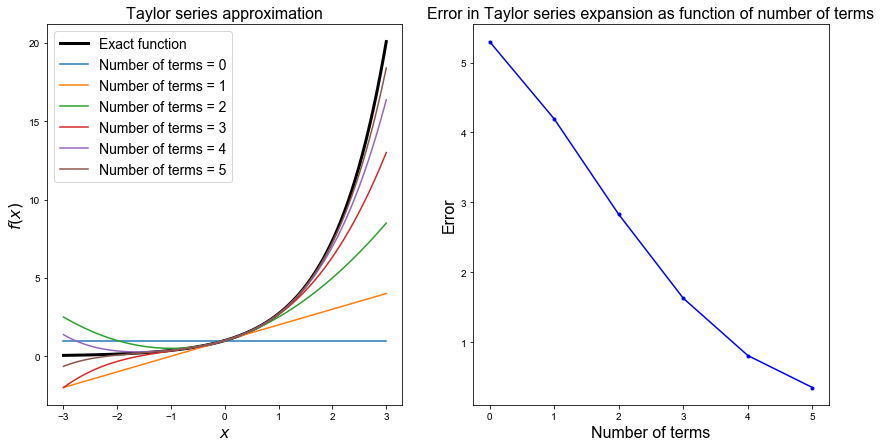

In [2]:
from math import factorial

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(121)

ax1.set_title('Taylor series approximation', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)

# exp is a convenient function to use as an example since all the derivatives are the same: df/dx = f, etc

def f(x):
    return np.exp(x)

# define our x for plotting purposes
x = np.linspace(-3., 3., 1000)

# plot exact function
ax1.plot(x, f(x), 'k', lw=3, label='Exact function')

taylor_series_expansion = np.zeros_like(x)
N = 6
errors = np.zeros(N)
# plot Taylor series truncated at increasing numbers of terms
for i in range(N):
    # rather than functions for higher order derivs, for exp example we can just keep pointing at f(.)
    taylor_series_expansion += f(0) * (x - 0.)**i / factorial(i)
    # compute the error in our approximation.   QQQQQQ - why have I divided by square root of length of x here ???????
    errors[i] = np.linalg.norm( taylor_series_expansion - f(x) ) / np.sqrt(len(x))
    ax1.plot(x, taylor_series_expansion, label='Number of terms = {0:1d}'.format(i))

ax1.legend(loc='best', fontsize=14)
ax2 = plt.subplot(122)
ax2.plot(range(6), errors, 'b.-')
ax2.set_xlabel('Number of terms', fontsize=16)
ax2.set_ylabel('Error', fontsize=16)
ax2.set_title('Error in Taylor series expansion as function of number of terms', fontsize=16);

## Homework - Upwind vs central discretrisation

Use our codes `BVP_AD_central` and `BVP_AD_upwind` to compute and plot error convergence for these two schemes for our test problem from the lecture with a Peclet number of 10.
    
Hence, establish that even though the upwind scheme is coupled with a second-order scheme for diffusion, it is the first-order contribution to the overall error which ultimately dominates and so the overall scheme is only first-order accurate.


### Solution - Upwind vs central discretrisation

In [3]:
def BVP_AD_central(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C


def BVP_AD_upwind(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff - r_adv
        A[i, i + 1] = r_diff
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C

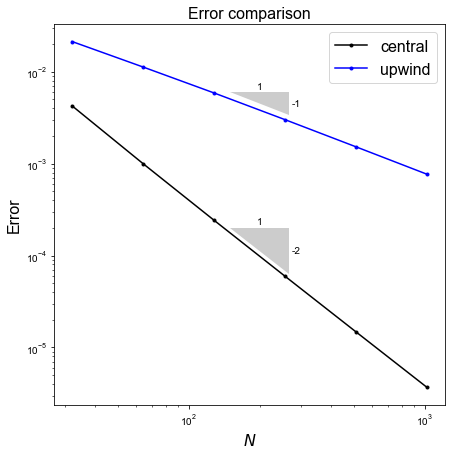

In [4]:
kappa = 0.005
L = 1
Pe = 10.
U = Pe * kappa / L
CE = 1

fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))

def exact_sol(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)

Ns = [32, 64, 128, 256, 512, 1024]
errors_central = np.zeros(len(Ns))
errors_upwind = np.zeros(len(Ns))

for i, N in enumerate(Ns):
    x, C = BVP_AD_central(L, U, kappa, CE, N)
    errors_central[i] = np.linalg.norm( C - exact_sol(x) ) / np.sqrt(len(x))
    x, C = BVP_AD_upwind(L, U, kappa, CE, N)
    errors_upwind[i] = np.linalg.norm( C - exact_sol(x) ) / np.sqrt(len(x))

ax1.loglog(Ns, errors_central, 'k.-', label='central')    
ax1.loglog(Ns, errors_upwind, 'b.-', label='upwind') 
ax1.set_xlabel('$N$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Error comparison', fontsize=16)
ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1.5e2, 6e-3), (-1, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((1.5e2, 2e-4), (-2, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05)

## Homework - Larger stencils / higher orders of accuracy [$\star\star$]

We saw in the lecture first- and second-order approximations to the first derivative.

By making use of more points (expanding the stencil) it is possible to come up with approximations of arbitrary order.

Tables of coefficients, assuming a uniform mesh, can be found at:
<https://en.wikipedia.org/wiki/Finite_difference_coefficient>

Try expanding our example from the lecture where we computed the first derivative of $\sin(x)$ at the location $x=0.8$ and plotted the error as a function of $\Delta x$, with some other examples of finite difference stencils from the tables at that web page.

[NB. the part of the question above is quite simple - in the sample solution I demonstrate an implementation of the third order accurate scheme; the part of the question below is more complicated].

Note that in the section of that web page titled "Arbitrary stencil points" it also gives a matrix system which can be solved for the finite difference coefficients which provides an approximation of arbitrary order derivatices on an arbitrary stencil. 

For a more in-depth description and derivation take a look at: <http://web.media.mit.edu/~crtaylor/calculator.html>
(click on "How does it work?").

Write some code to construct and solve this matrix system, and hence extend the convergence plot we presented above for the first derivative of $\sin(x)$ and $x=0.8$ for orders 1-6.

### Solution - Larger stencils / higher orders of accuracy

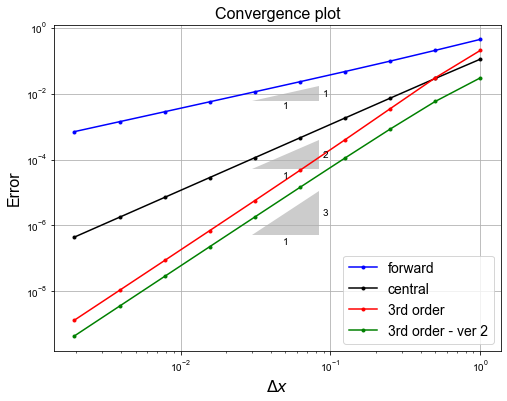

In [5]:
def forward_diff(f, x, dx):
    """ Function to evaluate the first-order forward finite difference
    approximation to the first derivative,
    of function $f$, at location $x$ and using a mesh size of $dx$.
    """
    fx = f(x)
    fxph = f(x + dx)
    return (fxph - fx) / dx

def central_diff(f, x, dx):
    """ Function to evaluate the second-order centred finite difference
    approximation to the first derivative,
    of function $f$, at location $x$ and using a mesh size of $dx$.
    """
    fxph = f(x + dx)
    fxnh = f(x - dx)
    return (fxph - fxnh) / (2 * dx)


def diff_3(f, x, dx):
    """ Function to evaluate at third-order accuracy the
    finite difference approximation to the first derivative,
    of function $f$, at location $x$ and using a mesh size of $dx$.
    """
    return (-11*f(x) + 18*f(x+dx) -9*f(x+2*dx) + 2*f(x+3*dx)) / (6 * dx)

def diff_3b(f, x, dx):
    """ Another function which evaluates at third-order accuracy the
    finite difference approximation to the first derivative,
    of function $f$, at location $x$ and using a mesh size of $dx$.
    """
    return (2*f(x+dx) + 3*f(x) - 6*f(x-dx) + f(x-2*dx)) / (6 * dx)

# for this example we know trivially what the exact solution should be
exact = np.cos(0.8)

# we're going to store all the values for plotting, initialise variable for these
fd_errors = []
cd_errors = []
d3_errors = []
d3_errorsb = []
dx_all = []
dx = 1.0  # an initial mesh spacing
for i in range(10):
    fd = forward_diff(np.sin, 0.8, dx)
    cd = central_diff(np.sin, 0.8, dx)
    d3 = diff_3(np.sin, 0.8, dx)
    d3b = diff_3b(np.sin, 0.8, dx)
    # store the h and the errors
    dx_all.append(dx)
    fd_errors.append(abs(fd - exact))
    cd_errors.append(abs(cd - exact))
    d3_errors.append(abs(d3 - exact))
    d3_errorsb.append(abs(d3b - exact))
    dx = dx / 2  # halve h for the next iteration


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)

ax1.loglog(dx_all, fd_errors, 'b.-', label='forward')
ax1.loglog(dx_all, cd_errors, 'k.-', label='central')
ax1.loglog(dx_all, d3_errors, 'r.-', label='3rd order')
ax1.loglog(dx_all, d3_errorsb, 'g.-', label='3rd order - ver 2')
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)
annotation.slope_marker((3e-2, 6e-3), (1, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((3e-2, 5e-5), (2, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((3e-2, 5e-7), (3, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05)

In [6]:
# functions to evaluate the finite difference coefficients and then
# use them to evaluate a numerical approximation to the derivative.

def calc_fd_coeffs(s, k):
    """ A function to compute finite difference coefficients 
    approximating an order k derivative on a stencil given by
    the array s.
    """
    n = len(s)
    A = np.zeros((n,n))
    b = np.zeros(n)
    for i in range(n):
        A[i,:] = s**i  
    b[k] = factorial(k)
    return np.linalg.solve(A,b)

def eval_fd_approx(f, x, s, fd_coeffs, dx):
    """ A function to evaluate the finite difference approximation to the
    derivative of f at location x using stencil s, finite diff coeffecients 
    from the function calc_fd_coeffs and with mesh spacing dx.
    """
    val = 0.
    for i in range(len(fd_coeffs)):
        val += fd_coeffs[i] * f(x + s[i]*dx)
    return val

fd_coeffs =  [-1.  1.]
fd_coeffs =  [-0.5  0.   0.5]
fd_coeffs =  [ 0.16666667 -1.          0.5         0.33333333]
fd_coeffs =  [ 8.33333333e-02 -6.66666667e-01 -2.37904934e-16  6.66666667e-01
 -8.33333333e-02]
fd_coeffs =  [-0.03333333  0.25       -1.          0.33333333  0.5        -0.05      ]
fd_coeffs =  [-1.66666667e-02  1.50000000e-01 -7.50000000e-01  5.89061811e-17
  7.50000000e-01 -1.50000000e-01  1.66666667e-02]


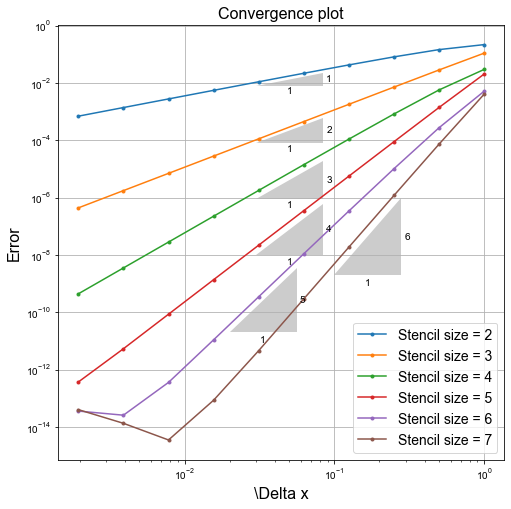

In [7]:
# for this example we know trivially what the exact solution should be
exact = np.cos(0.8)

# tuple of stencils to consider
ss = (np.array([-1,0]), 
      np.array([-1,0,1]), 
      np.array([-2,-1,0,1]), # this is the stencil implemented in function `diff_3b` above
      np.array([-2,-1,0,1,2]), 
      np.array([-3,-2,-1,0,1,2]), 
      np.array([-3,-2,-1,0,1,2,3]))

# dx values to use in the convergence plot
dxs = [2.**(-i) for i in range(10)]

# storage for the errors
errors = np.zeros((len(dxs), len(ss)))

   
for j, s in enumerate(ss):
    fd_coeffs = calc_fd_coeffs(s,1)
    print('fd_coeffs = ', fd_coeffs)
    for i, dx in enumerate(dxs):
        fd = eval_fd_approx(np.sin, 0.8, s, fd_coeffs, dx)
        # need to remember to divide through by mesh spacing to power of derivative order (here 1)
        fd = fd / dx
        errors[i,j] = abs(fd - exact)
        
# set up figure
fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(111)

for j in range(errors.shape[1]):
    ax1.loglog(dxs, errors[:,j], '.-', label='Stencil size = {0:1d}'.format(len(ss[j])))
    
ax1.set_xlabel('\Delta x', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)
annotation.slope_marker((3e-2, 8e-3), (1, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((3e-2, 8e-5), (2, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((3e-2, 9e-7), (3, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((3e-2, 1e-8), (4, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-2, 2e-11), (5, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((1e-1, 2e-9), (6, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05)

## Homework - Shooting method to solve BVPs (or IVP solve + root finding) - pure diffusion case [$\star$]

Recall the BVP obtained from considering the steady state solution to the diffusion problem in 1D with Dirichlet BCs specified at the two ends of the domain:

$$\kappa\frac{\partial^2 c}{\partial x^2}=0, \;\;\;\; c(0) = 0, \;\;\;\; c(1)=1.$$

First remind yourself of the exact solution to the problem and plot the numerical solution obtained from discretising the problem using central differences and solving the resulting linear matrix system (we did this in the lecture).

Once you've done this let's try to solve this problem using a *shooting method* instead (we already saw an example of this in the LEcture 5 homework).

First note that we can rewrite our second-order problem in the form of two coupled first-order ODEs

$$
\boldsymbol{u}_x 
= 
\begin{bmatrix} 
u_2 \\ 
0 
\end{bmatrix}
$$

where 

$$
\boldsymbol{u} 
\equiv
\begin{bmatrix} 
u_1 \\ 
u_2 
\end{bmatrix}
= 
\begin{bmatrix} 
c \\ 
c_x 
\end{bmatrix}
$$

We are going to solve this problem as an IVP from $x=0$ up to $x=L$ (thinking of $x$ as a time like variable).

An IVP specified all auxiliary conditions as the same location (at the initial "time", or here at $x=0$).

We know that $c(0)=0$ and hence $u_1(0)=0$, but what do we take for $u_2(0)$?

The idea behind the shooting method is to try (i.e. solve the "IVP" for) different values of $u_2(0)$, iterating until we find a solution which achieves our additional condition - here that $u_1(1)=1$. In practice we iterate until we reach this goal to a user-defined tolerance.

### Solution - Shooting method to solve BVPs (or IVP solve + root finding) - pure diffusion case

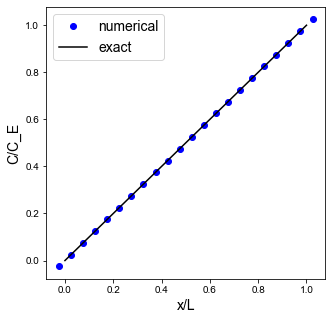

In [8]:
# First this is the solution we obtain using the linear algebra approach from the lecture

kappa = 0.005
L = 1
N = 20
dx = L / N
CE = 1
Pe = 10
U = Pe * kappa / L

x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
A = np.zeros((N + 2, N + 2))
b = np.zeros((N + 2, 1))

# % interior points
r = kappa / dx**2
for i in range(1, N + 1):
    A[i, i - 1] = r
    A[i, i] = -2 * r
    A[i, i + 1] = r
    b[i] = 0

# % BC1
A[0, 0] = 0.5
A[0, 1] = 0.5
b[0] = 0

# % BC2
A[N + 1, N] = 0.5
A[N + 1, N + 1] = 0.5
b[N + 1] = CE  # % BC2

#% invert matrix
C = np.linalg.solve(A, b)

xf = np.linspace(0, L, 1000)
Cex = xf / L * CE
# set up figure
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)
ax1.plot(x, C, 'ob', xf, Cex, '-k')
ax1.set_xlabel('x/L', fontsize=14)
ax1.set_ylabel('C/C_E', fontsize=14)
ax1.legend(('numerical', 'exact'), loc='best', fontsize=14);

Final u2(0) guess 9.999149e-01 gives a value of u1(1) of 9.999149e-01


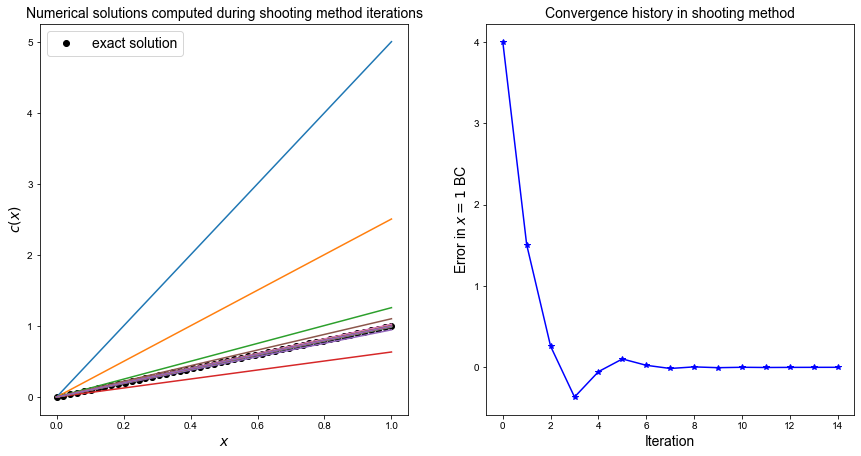

In [9]:
# Now a shooting method

# Rather than use one of our own IVP solvers, here we will make use of a SciPy solver

# and make use of our bisection solver approach from L4

import scipy.integrate as si

# Define some stopping criteria
# how accurately we want to achieve the right hand BC
tol = 1.e-4
# but set an upper limit on how many iterations we will allow
max_its = 100


# physical parameters defining problem
kappa = 0.005
L = 1
CE = 1
Pe = 10
U = Pe * kappa / L

# the RHS function for our coupled first-order ODE system
def shooting_f(x, u):
    return np.array( [ u[1], 0.0 ] )


# An initial guess for u[1](x=0), i.e. the derivative of c at x=0.
ux_guess_1 = 1.e-2

# and another one for use with the bisection method (can find this through trial and error)
ux_guess_2 = 1.e1

# we will always be integrating over the same independent variable range 
# define a series of points to be returned for plotting purposes, we will
# pass the first and last values of this to the integrator as the range to
# integrate over.
iv_range = np.linspace(0.0, 1.0, 100)

sol_1 = si.solve_ivp(shooting_f, [iv_range[0], iv_range[-1]], np.array([0.0, ux_guess_1]), 
                     method='RK45', t_eval=iv_range)
right_value_1 = sol_1.y[0][-1]

sol_2 = si.solve_ivp(shooting_f, [iv_range[0], iv_range[-1]], np.array([0.0, ux_guess_2]), 
                     method='RK45', t_eval=iv_range)
right_value_2 = sol_2.y[0][-1]

# now iterate until convergence using the bisection method
for it in range(max_its):
    ux_guess_mid = (ux_guess_1 + ux_guess_2) / 2
    sol_mid = si.solve_ivp(shooting_f, [
                           iv_range[0], iv_range[-1]], np.array([0.0, ux_guess_mid]), 
                           method='RK45', t_eval=iv_range)
    right_value_mid = sol_mid.y[0][-1]
    if it == 0:
        conv_history = (right_value_mid - CE)
        sol_history = sol_mid.y[0]
    else:
        conv_history = np.append(conv_history, (right_value_mid - CE))
        # store this numerical solution for plotting purposes - just the first component
        sol_history = np.vstack((sol_history, sol_mid.y[0]))
        # check for convergence
        if np.fabs(right_value_mid - CE) < tol:
            break
    # update the interval using the bisection algorithm
    if (right_value_1 - CE) * (right_value_mid - CE) > 0:
        ux_guess_1 = ux_guess_mid
        right_value_1 = right_value_mid
    else:
        ux_guess_2 = ux_guess_mid
        right_value_2 = right_value_mid

print('Final u2(0) guess %e gives a value of u1(1) of %e' %(ux_guess_mid, right_value_mid ))
            
# set up our figs for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(w_pad=5)  # add some padding otherwise axes labels overlap
# plot exact solution
xf = np.linspace(0, L, 50)
Cex = xf / L * CE
ax1.plot(xf, Cex, 'ko', label='exact solution')
# plot numerical solution from iterations

for it in range(np.shape(sol_history)[0]):
    ax1.plot(iv_range, sol_history[it,:])

ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$c(x)$', fontsize=14)
ax1.set_title('Numerical solutions computed during shooting method iterations', fontsize=14)
ax1.legend(loc='best', fontsize=14)

ax2.plot(conv_history, 'b*-')
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel('Error in $x=1$ BC', fontsize=14)
ax2.set_title('Convergence history in shooting method', fontsize=14);

In [14]:
sol_history.shape

(15, 100)

## Homework - Shooting method to solve BVPs (or IVP solve + root finding) - advection-diffusion case [$\star$]

Consider now the advection-diffusion problem

$$U\frac{\partial c}{\partial x} = \kappa\frac{\partial^2 c}{\partial x^2}, \;\;\;\; c(0) = 0, \;\;\;\; c(1)=1 $$

We can write this as two coupled first-order ODEs

$$
\boldsymbol{u}_x 
= 
\begin{bmatrix} 
u_2 \\ 
\frac{U}{\kappa}u_2 
\end{bmatrix}
$$

where 

$$
\boldsymbol{u} 
\equiv
\begin{bmatrix} 
u_1 \\ 
u_2 
\end{bmatrix}
= 
\begin{bmatrix} 
c \\ 
c_x 
\end{bmatrix}
$$

Again, we are going to solve this problem as an IVP from $x=0$ up to $x=1$ with $u_1(0)=0$, but $u_2(0)$ unknown.

### Solution - Shooting method to solve BVPs (or IVP solve + root finding) - advection-diffusion case

Final u2(0) guess 4.548135e-04 gives a value of u1(1) of 9.999973e-01


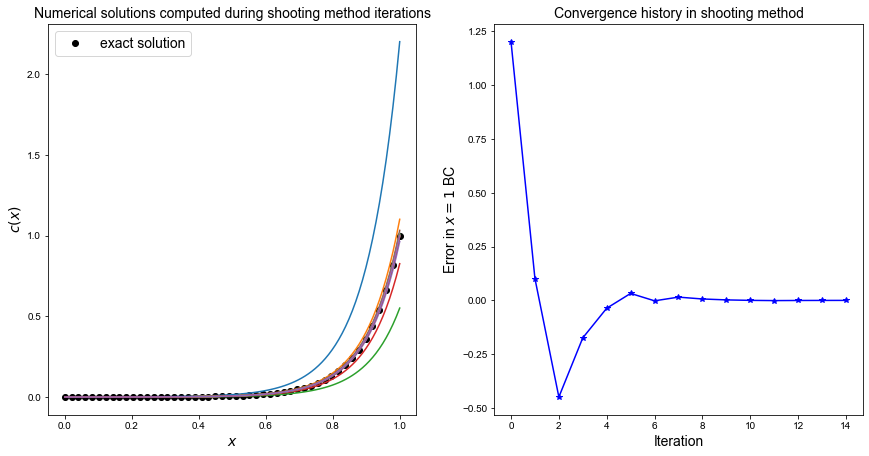

In [10]:
# Now a shooting method

# Rather than use one of our own IVP solvers, here we will make use of a SciPy solver

# and make use of our bisection solver approach from L4

import scipy.integrate as si

# Define some stopping criteria
# how accurately we want to achieve the right hand BC
tol = 1.e-4
# but set an upper limit on how many iterations we will allow
max_its = 100


# physical parameters defining problem
kappa = 0.005
L = 1
CE = 1
Pe = 10
U = Pe * kappa / L

# the RHS function for our coupled first-order ODE system
def shooting_f(x, u):
    return np.array( [ u[1], (U/kappa)*u[1] ] )


# An initial guess for u[1](x=0), i.e. the derivative of c at x=0.
ux_guess_1 = 1.e-6

# and another one for use with the bisection method (can find this through trial and error)
ux_guess_2 = 2.e-3

# we will always be integrating over the same independent variable range 
# define a series of points to be returned for plotting purposes, we will
# pass the first and last values of this to the integrator as the range to
# integrate over.
iv_range = np.linspace(0.0, 1.0, 100)

sol_1 = si.solve_ivp(shooting_f, [iv_range[0], iv_range[-1]], np.array([0.0, ux_guess_1]), 
                     method='RK45', t_eval=iv_range)
right_value_1 = sol_1.y[0][-1]

sol_2 = si.solve_ivp(shooting_f, [iv_range[0], iv_range[-1]], np.array([0.0, ux_guess_2]), 
                     method='RK45', t_eval=iv_range)
right_value_2 = sol_2.y[0][-1]

# now iterate until convergence using the bisection method
for it in range(max_its):
    ux_guess_mid = (ux_guess_1 + ux_guess_2) / 2
    sol_mid = si.solve_ivp(shooting_f, [
                           iv_range[0], iv_range[-1]], np.array([0.0, ux_guess_mid]), 
                           method='RK45', t_eval=iv_range)
    right_value_mid = sol_mid.y[0][-1]
    if it == 0:
        conv_history = (right_value_mid - CE)
        sol_history = sol_mid.y[0]
    else:
        conv_history = np.append(conv_history, (right_value_mid - CE))
        # store this numerical solution for plotting purposes - just the first component
        sol_history = np.vstack((sol_history, sol_mid.y[0]))
        # check for convergence
        if np.fabs(right_value_mid - CE) < tol:
            break
    # update the interval using the bisection algorithm
    if (right_value_1 - CE) * (right_value_mid - CE) > 0:
        ux_guess_1 = ux_guess_mid
        right_value_1 = right_value_mid
    else:
        ux_guess_2 = ux_guess_mid
        right_value_2 = right_value_mid

print('Final u2(0) guess %e gives a value of u1(1) of %e' %(ux_guess_mid, right_value_mid))
            
# set up our figs for plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(w_pad=5)  # add some padding otherwise axes labels overlap
# plot exact solution
xf = np.linspace(0, L, 50)
Cex = CE * (np.exp(Pe * xf / L) - 1) / (np.exp(Pe) - 1)
ax1.plot(xf, Cex, 'ko', label='exact solution')
# plot numerical solution from iterations

for it in range(np.shape(sol_history)[0]):
    ax1.plot(iv_range, sol_history[it,:])

ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$c(x)$', fontsize=14)
ax1.set_title('Numerical solutions computed during shooting method iterations', fontsize=14)
ax1.legend(loc='best', fontsize=14)

ax2.plot(conv_history, 'b*-')
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel('Error in $x=1$ BC', fontsize=14)
ax2.set_title('Convergence history in shooting method', fontsize=14);

Note also that for this problem with a boundary layer and an exact solution made up of exponentials, the shooting method is not very robust - it only worked above with the simple update algorithm due to a very small initial guess being given.

The [multiple shooting method](https://en.wikipedia.org/wiki/Direct_multiple_shooting_method) is a potentially more robust extension.

## Homework - Sparse matrices & Iterative solvers [$\star\star$]

As we noted in lecture 3 at some point our problems become large enough that we need to use iterative rather than direct linear solvers.

Let's see what happens when we try to use iterative matrix solvers to invert our discretisation matrix.

Update our `BVP_AD_central` function so that it now also returns the $A$ matrix and RHS $\boldsymbol{b}$ vector.


- Check whether the discretisation matrix is symmetric or not.


- Solve the system using one of our direct solvers from L3, e.g. `np.linalg.solve`.


- Recall we said in L3 that the conjugate gradient matrix only works for positive definite matrices. Solve our problem using the CG method and check whether the solution you obtain agrees with the solution from the direct solver.


- GMRES is an alternative iterative solver that does work with nonsymmetric matrices. Solve our problem with GMRES and check whether this solution agrees with the direct solver.


### Solutions - Sparse matrices & Iterative solvers

NB. In below we don't actually use sparse data structures to store our sparse matrices (i.e. we explicitly store all the zeros), but for large problem sizes we really should for efficiency.

In [11]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1


def BVP_AD_central_matrix(L, U, kappa, CE, N):
    """ function to assemble the AD BVP problem
    using central differences for both adv and diff
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    return x, C, A, b

N = 8
x, C, A, b = BVP_AD_central_matrix(L, U, kappa, CE, N)
print('A = \n',A)
print('\nb = \n',b)
# check whether A is symmetric
print('\nMatrix is symmetric: ',np.allclose(A, A.T, atol=1.0e-10))
# solve first using a direct method
C = np.linalg.solve(A, b)
print('\nC = \n',C)
# now see what CG does
C_cg, int = spla.cg(A, b, x0=None, tol=1e-10, maxiter=1000)
print('\nC_cg = \n',C_cg.T)
# and finally GMRES
C_gmres, int = spla.gmres(A, b, x0=None, tol=1e-10, maxiter=1000)
print('\nC_gmres =\n',C_gmres)

print('\nC = C_cg: ',np.allclose(C, C_cg, atol=1.0e-6))
print('\nC = C_gmres: ',np.allclose(C, C_gmres, atol=1.0e-6))


A = 
 [[ 0.5   0.5   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.52 -0.64  0.12  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.52 -0.64  0.12  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.52 -0.64  0.12  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.52 -0.64  0.12  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.52 -0.64  0.12  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.52 -0.64  0.12  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.52 -0.64  0.12  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.52 -0.64  0.12]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.5   0.5 ]]

b = 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Matrix is symmetric:  False

C = 
 [-5.02697505e-06  5.02697505e-06  4.85940921e-05  2.37384933e-04
  1.05547858e-03  4.60055103e-03  1.99625317e-02  8.65311144e-02
  3.74994973e-01  1.62500503e+00]

C_cg = 
 [ 1.58217486e-03 -2.58993888e-03 -1.22454802e-02 -2.61749906e-02
 -6.45940831e-03 -1.50903685e-02  3.62653207e-02 

If we set $U = 0$ (i.e. no advection) and also ignore boundaries (throw away first and last rows of A) we can make A symmetric.

In this case do CG and GMRES return the same values as LU?

In [12]:
# if we set U = 0 (i.e. no advection) and also ignore boundaries (throw away first and last
# rows on A) we can make A symmetric:
U = 0 
x, C, A, b = BVP_AD_central_matrix(L, U, kappa, CE, N)
A = A[1:-1,1:-1]
# b for this case is all zero if we lose boundary values, so set to random
b = np.random.rand(np.shape(b[1:-1])[0])
print('A = \n',A)
print('\nb = \n',b)
print('\nMatrix is symmetric: ',np.allclose(A, A.T, atol=1.0e-10))
C = np.linalg.solve(A, b)
print('\nC = \n',C)
C_cg, int = spla.cg(A, b, x0=None, tol=1e-10, maxiter=1000)
print('\nC_cg = \n',C_cg.T)
C_gmres, int = spla.gmres(A, b, x0=None, tol=1e-10, maxiter=1000)
print('\nC_gmres',C_gmres)

print('\nC = C_cg: ',np.allclose(C, C_cg, atol=1.0e-6))
print('\nC = C_gmres: ',np.allclose(C, C_gmres, atol=1.0e-6))

A = 
 [[-0.64  0.32  0.    0.    0.    0.    0.    0.  ]
 [ 0.32 -0.64  0.32  0.    0.    0.    0.    0.  ]
 [ 0.    0.32 -0.64  0.32  0.    0.    0.    0.  ]
 [ 0.    0.    0.32 -0.64  0.32  0.    0.    0.  ]
 [ 0.    0.    0.    0.32 -0.64  0.32  0.    0.  ]
 [ 0.    0.    0.    0.    0.32 -0.64  0.32  0.  ]
 [ 0.    0.    0.    0.    0.    0.32 -0.64  0.32]
 [ 0.    0.    0.    0.    0.    0.    0.32 -0.64]]

b = 
 [0.78263492 0.55430084 0.99644775 0.77030396 0.26759557 0.94218154
 0.11094724 0.32828477]

Matrix is symmetric:  True

C = 
 [ -8.47864503 -14.51155593 -18.81227672 -19.99909831 -18.77872001
 -16.72210554 -11.72117376  -6.37353184]

C_cg = 
 [ -8.47864503 -14.51155593 -18.81227672 -19.99909831 -18.77872001
 -16.72210554 -11.72117376  -6.37353184]

C_gmres [ -8.47864503 -14.51155593 -18.81227672 -19.99909831 -18.77872001
 -16.72210554 -11.72117376  -6.37353184]

C = C_cg:  True

C = C_gmres:  True
